In [1]:
# Scikit-learn
#  
# Géron (2022)
#   Ch. 3 "Classification" (pp. 103-174
#   Data : MNIST
#       Note: the training set is already shuffled for us

import pandas as pd

# Get the data as NumPy array with as_frame=False
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', 
                     as_frame=False,
                     parser='auto')

X, y = mnist.data, mnist.target

In [2]:
# X has 70000 rows images and 784 columns (28 times 28 pixels), y has 70000 labels
print(f"X has {X.shape[0]} rows and {X.shape[1]} columns")
print(f"y has {y.shape[0]} rows")

X has 70000 rows and 784 columns
y has 70000 rows


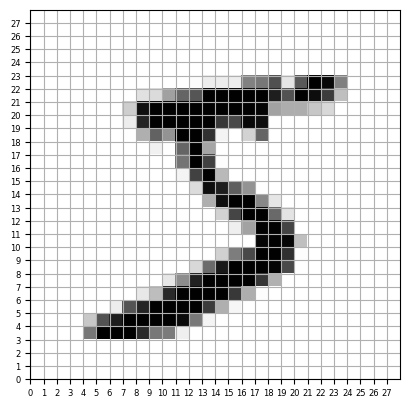

'5'

In [3]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary", extent=[0, 28, 0, 28])
    plt.grid(True, which='both', axis='both')
    plt.xticks(range(0, 28, 1), fontsize=6)
    plt.yticks(range(0, 28, 1), fontsize=6)
    plt.show()

plot_digit(X[0])
y[0]

In [4]:
# Training data (obs. 0 to 59999) is already shuffled
# Test data (obs. 60000 to 69999) does not need to be shuffled
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [5]:
# We consider two classes: 5 and not-5
#   y_train includes numbers in {0,...,9}, convert y_train and y_test to boolean arrays
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')
for j1, j2 in zip(y_train[:5], y_train_5[:5]):
    print(j1, j2)

5 True
0 False
4 False
1 False
9 False


In [6]:
# Training
#   Stochastic Gradient Descent (SGD) classifier
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(random_state = 42)
model.fit(X_train, y_train_5)

# Predict the image of '5'
model.predict([X_train[0]])

array([ True])

In [7]:
# Performance measures
#   Cross-validation with three folds (cv = 3), two for training, one for validation.
#       Note: Géron does not use Cross-validation on the entire data. Therefore, the
#             training set is split into three subsets. On page 108, Géron implements
#             Cross-Validation manually.
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [8]:
# Overall, 95.23 % of 5s are correctly classified
print((y_train_5 == model.predict(X_train)).mean())

0.9522666666666667


In [9]:
# Dummy classifier.
#   'prior': the predict method returns the most frequent class label in y_train_5: non-'5'.
#  
from sklearn.dummy import DummyClassifier
model = DummyClassifier(strategy='prior')
model.fit(X_train, y_train_5)
prediction = model.predict(X_train)

# The training data has 90.965 % of non-'5', the classifier predicts 0% of '5'
print(y_train_5.mean())
print(prediction.mean())

for j1, j2 in zip(y_train_5[:5], prediction[:5]):
    print(f"{j1:<10}{j2:<10}")
print(any(prediction))
cross_val_score(model, X_train, y_train_5, cv = 3, scoring = 'accuracy')

0.09035
0.0
1         0         
0         0         
0         0         
0         0         
0         0         
False


array([0.90965, 0.90965, 0.90965])

In [10]:
# Precision and recall
#   Precision = TP / (TP + FP)
#   Recall (sensitivity, true positive rate) = TP / (TP + FN)
#       TP = #true positives (correctly predicted '5'),
#       FP = #false positives (falsely predicted '5'),
#       FN = #false negatives (falsely predicted non-'5')

from sklearn.linear_model import SGDClassifier
model = SGDClassifier(random_state = 42)
model.fit(X_train, y_train_5)
prediction = model.predict(X_train)

In [11]:
# Confusion matrix
#   A 2x2 matrix with four elements: actual class (rows), predicted class (column)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_train_5, prediction)
matrix

array([[52316,  2263],
       [  601,  4820]], dtype=int64)

In [12]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_train_5, prediction)
recall = recall_score(y_train_5, prediction)

print(f"Precision: {precision:.5f}")    # 4820 / (4820 + 2263)
print(f"Recall: {recall:.5f}")          # 4820 / (4820 + 601)

Precision: 0.68050
Recall: 0.88913


In [13]:
from sklearn.metrics import f1_score
print(f1_score(y_train_5, prediction))

0.7709532949456175
